In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k"

In [3]:
df_phish = pd.read_csv("result_v2_opti.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_v2_benign_opti.txt", sep="\t")
df_benign["is_phish"] = 0

df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]
df_benign = df_benign.iloc[:19000, :]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_143594/3121846271.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_143594/3121846271.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (18432, 7)
Legit sites: (19000, 7)
Dataframe sites: (37432, 7)


In [5]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [6]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,15594,3406,19000
1,14555,3877,18432
All,30149,7283,37432


In [7]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,15594,3406,19000
1,17060,1372,18432
All,32654,4778,37432


In [8]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.5323355759989016, Precision brand: 0.28714943491000416
Sensitivity: 0.21034071180555555, Sensitivity brand: 0.0744357638888889


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(14555, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-05-19-05`17`59/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Dropbox, Inc.+2019-09-08-19`23`13/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Societe Generale+2019-10-19-05`10`46/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Bank of America+2019-10-23-08`46`02/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PostFinance+2019-10-22-11`12`56/shot.png']

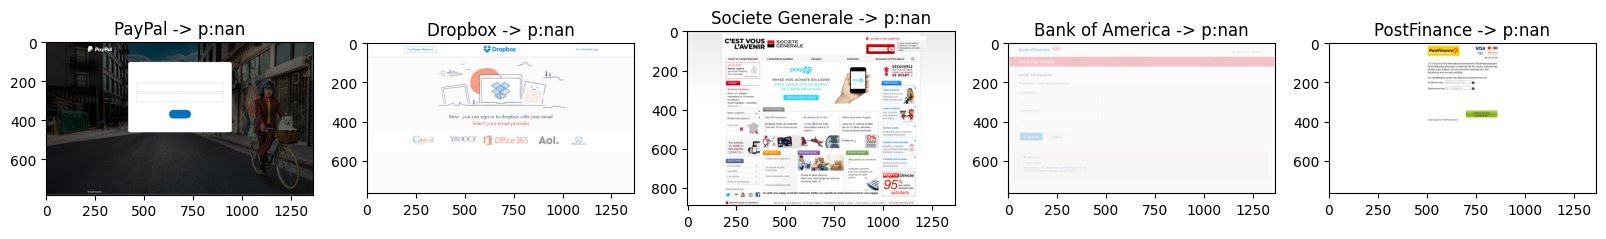

In [10]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(3406, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/2kmtcentral.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/sparkasse-magdeburg.de/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/school-access.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/yestone.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/charentelibre.fr/shot.png']

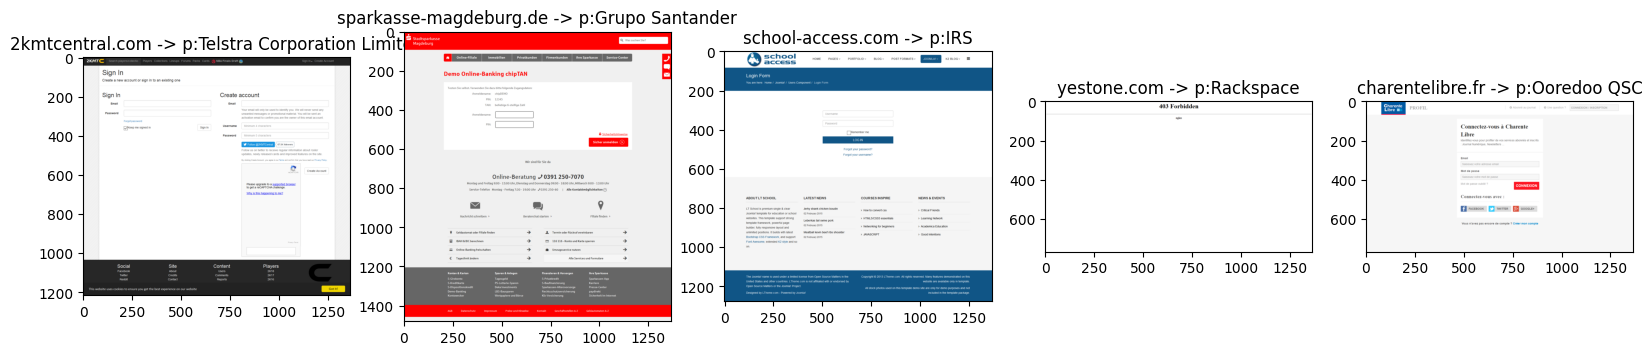

In [18]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(2505, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-09-23-19`41`27/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Adobe Inc.+2020-09-09-10`25`44/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-08-09-11`13`20/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Facebook, Inc.+2020-08-30-17`01`29/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-09-12-11`20`34/shot.png']

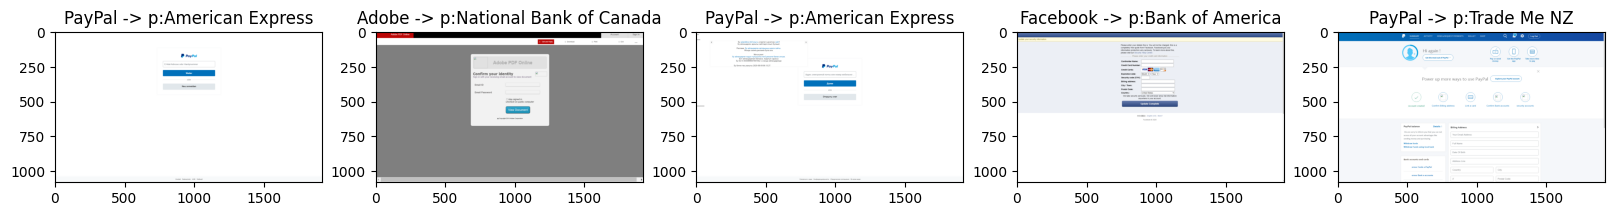

In [20]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "phish_sample_30k/Instagram+2020-08-18-10`45`48/shot.png",
    "phish_sample_30k/WeTransfer+2020-05-29-12`53`50/shot.png",
    "phish_sample_30k/Orange+2020-09-24-19`16`09/shot.png",
    "phish_sample_30k/Chase Personal Banking+2020-08-18-13`05`21/shot.png",
    "phish_sample_30k/Global Sources (HK)+2020-07-20-13`02`55/shot.png",
    "phish_sample_30k/Bank of America+2020-08-13-19`32`30/shot.png",
    "phish_sample_30k/Webmail Providers+2020-06-08-09`49`15/shot.png",
    "phish_sample_30k/GoDaddy+2019-08-20-12`41`23/shot.png"
]

examples_fp = [
    "benign_sample_30k/tvn.pl/shot.png",
    "benign_sample_30k/megapixel.cz/shot.png",
    "benign_sample_30k/jumoreglobal.com/shot.png",
    "benign_sample_30k/galianostore.com/shot.png",
    "benign_sample_30k/cubecraft.net/shot.png",
    "benign_sample_30k/northernbrewer.com/shot.png",
    "benign_sample_30k/thinkorswim.com/shot.png",
    "benign_sample_30k/ksk-melle.de/shot.png"
]

examples_false_brand = [
    "phish_sample_30k/WeTransfer+2019-10-23-05`51`44/shot.png",
    "phish_sample_30k/WhatsApp+2020-09-14-16`05`03/shot.png",
    "phish_sample_30k/Blockchain+2020-08-25-12`26`50/shot.png",
    "phish_sample_30k/AT&T Inc.+2020-07-14-11`18`23/shot.png",
    "phish_sample_30k/WeTransfer+2019-10-19-11`45`07/shot.png",
    "phish_sample_30k/Mastercard International Incorporated+2020-09-12-12`01`42/shot.png",
    "phish_sample_30k/Orange+2020-09-15-12`59`07/shot.png",
    "phish_sample_30k/Adobe Inc.+2020-05-10-18`21`05/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {3877}
\def \cFP {3406}
\def \cTN {15594}
\def \cFN {14555}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {7283}
\def \cFpN {30149}
\def \ctotal {37432}
\def \cPPV {53.2\%}
\def \cTPR {21.0\%}
\def \cACC {52.0\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {1372}
\def \cFP {3406}
\def \cTN {15594}
\def \cFN {17060}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {4778}
\def \cFpN {32654}
\def \ctotal {37432}
\def \cPPV {28.7\%}
\def \cTPR {7.4\%}
\def \cACC {45.3\%}

